In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer



In [2]:
df = pd.read_csv('TheSpotifyDataset.csv')

In [3]:
# Dealing with inconsistencies in the Artists column

df["Artists"]=df["Artists"].str.replace("[", "")
df["Artists"]=df["Artists"].str.replace("]", "")
df["Artists"]=df["Artists"].str.replace("'", "")

df.head(10)

,acousticness,Artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"""Screamin Jay Hawkins""",0.852,150200,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1/5/1920,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.7980,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1/1/1920,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.7070,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,10/1/1920,0.0768,122.076,0.2990,1920
5,0.996000,Mamie Smith & Her Jazz Hounds,0.424,198627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,-11.470,1,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.4770,1920
6,0.992000,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.4870,1920
7,0.996000,Mamie Smith & Her Jazz Hounds,0.474,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186000,9,0.1950,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.3660,1920
8,0.996000,Francisco Canaro,0.469,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,7/8/1920,0.0741,130.060,0.6210,1920
9,0.006820,Meetya,0.571,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1/1/1920,0.0446,126.993,0.1190,1920


In [4]:
df.drop(['id'],inplace=True,axis=1)   #Drop the unnecessary column

In [5]:
df.shape      #total no of rows and columns

(174389, 18)

In [6]:
df.isnull().sum()        #to check if we have any missing values

acousticness        0
Artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [7]:
df.duplicated().any().sum()        # Dealing with Duplicate Values
df = df[~df.duplicated()==1]
df.shape

(171226, 18)

In [8]:
df.duplicated().any().sum()       #no duplicate

0

In [9]:
df.describe()     #data summary

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,171226.000000,171226.000000,1.712260e+05,171226.000000,171226.000000,171226.000000,171226.000000,171226.000000,171226.000000,171226.000000,171226.000000,171226.000000,171226.000000,171226.000000,171226.000000
mean,0.501448,0.536245,2.326235e+05,0.481205,0.068196,0.193818,5.205016,0.211586,-11.769780,0.703655,26.073523,0.106078,116.959924,0.525658,1976.577039
std,0.379084,0.175612,1.472155e+05,0.271745,0.252083,0.332078,3.517591,0.180825,5.668019,0.456646,21.841593,0.183497,30.271045,0.264217,26.615544
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.091000,0.414000,1.662130e+05,0.248000,0.000000,0.000000,2.000000,0.099400,-14.913000,0.000000,2.000000,0.035100,93.888000,0.312000,1955.000000
50%,0.522000,0.547000,2.056625e+05,0.463000,0.000000,0.000488,5.000000,0.138000,-10.867000,1.000000,26.000000,0.045400,115.698000,0.537000,1977.000000
75%,0.895000,0.668000,2.654768e+05,0.707000,0.000000,0.231000,8.000000,0.271000,-7.543250,1.000000,43.000000,0.076000,134.994750,0.744000,1998.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


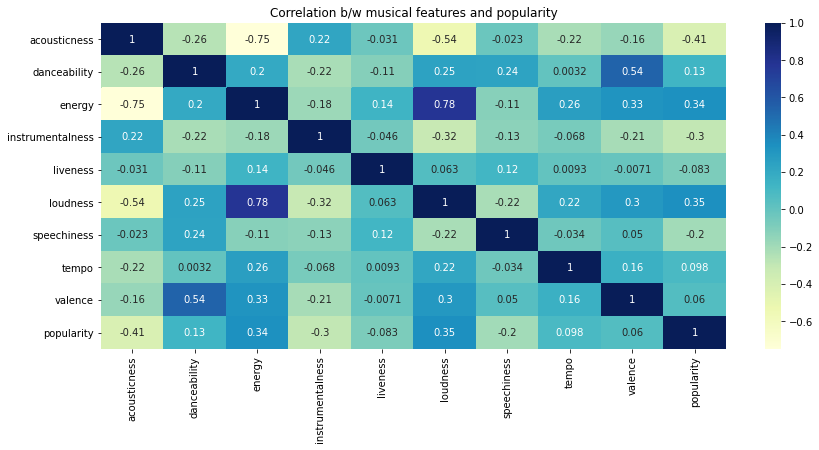

In [10]:
#correlation between musical features and popularity of the song

data = df[['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','popularity']].corr()
fig,ax=plt.subplots(figsize=(14,6))
sns.heatmap(data,cmap='YlGnBu',annot=True)
plt.title('Correlation b/w musical features and popularity')
plt.show()

**The correlation between Musical Feature and Popularity**
1. Acousticness is correlated to instrumentalness and not very popular
2. Danceability is correlated to loudness and less popular.
3. Energy is highly correlated to loudness and which is quite popular.
4. Instrumentalness is negatively correlated to danceability  and energy and is very less popular.
5. Loudness is negatively correlated to accousticness.
6. Valence and danceability is correlated.
7. Audio features like loudness and energy are quite popular.

**Trends over the years**

Text(0.5, 1.0, 'Instrumentalness of the songs the years')

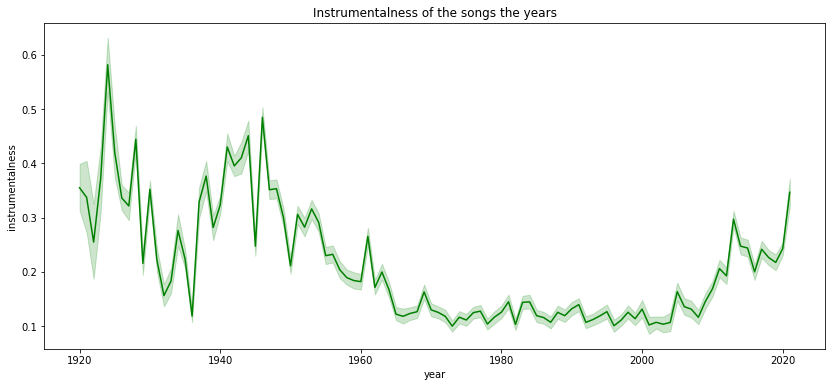

In [11]:
fig,ax=plt.subplots(figsize=(14,6))
sns.lineplot(x="year", y="instrumentalness", data = df, ax=ax, color='green') 
plt.title('Instrumentalness of the songs the years')  

Text(0.5, 1.0, 'Loudness Trend over the years')

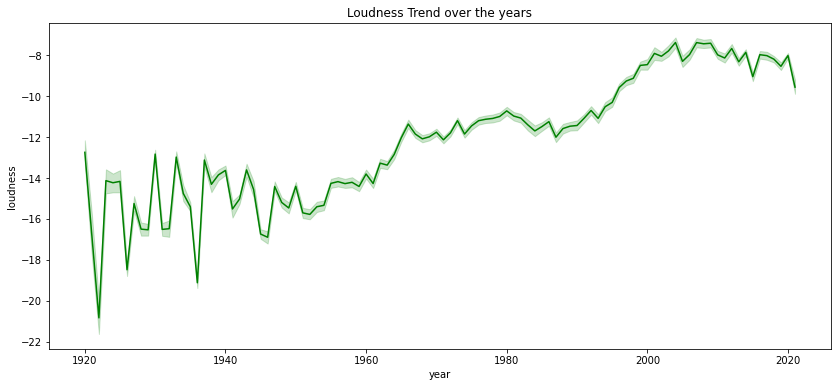

In [12]:
fig,ax=plt.subplots(figsize=(14,6))
sns.lineplot(x="year", y="loudness", data=df, ax=ax, color='green')
plt.title('Loudness Trend over the years')

Text(0.5, 1.0, 'Liveness Trend over the years')

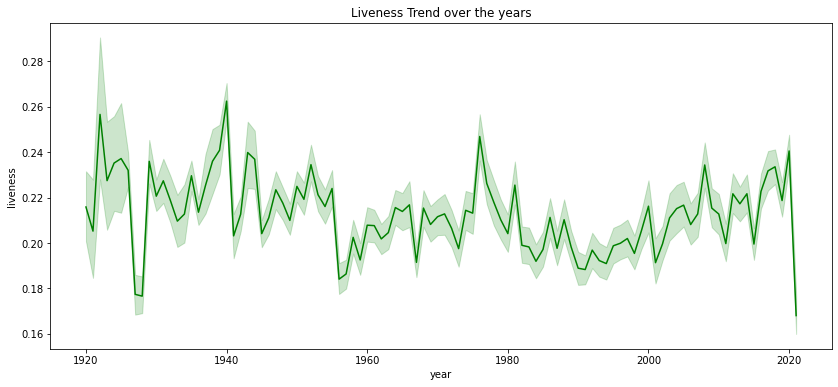

In [13]:
fig,ax=plt.subplots(figsize=(14,6))
sns.lineplot(x="year", y="liveness", data=df, ax=ax, color='green')
plt.title('Liveness Trend over the years')

Text(0.5, 1.0, 'Acousticness Trend over the years')

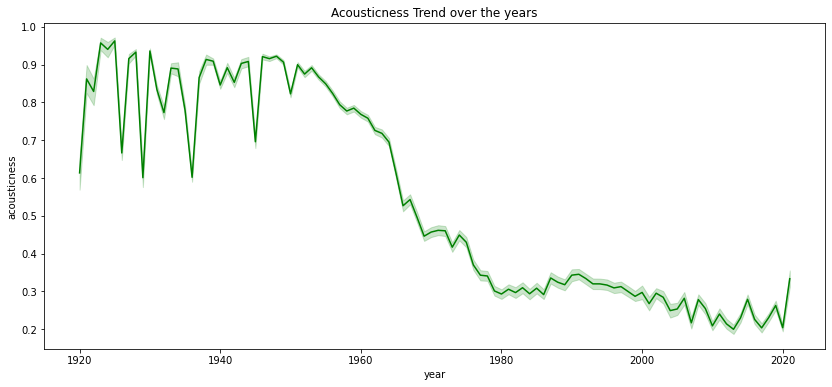

In [14]:
fig,ax=plt.subplots(figsize=(14,6))
sns.lineplot(x="year", y="acousticness", data=df, ax=ax,color='green')
plt.title('Acousticness Trend over the years')

Text(0.5, 1.0, 'speechiness Trend over the years')

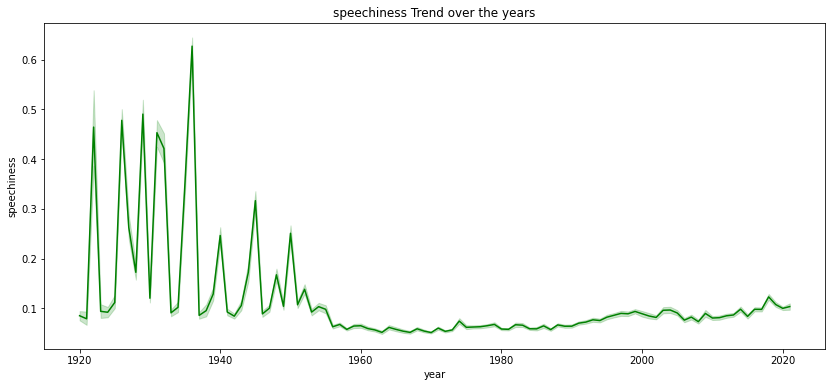

In [15]:
fig,ax=plt.subplots(figsize=(14,6))
sns.lineplot(x="year", y="speechiness", data=df, ax=ax, color='green')
plt.title('speechiness Trend over the years')

Text(0.5, 1.0, 'Energy Trend over the years')

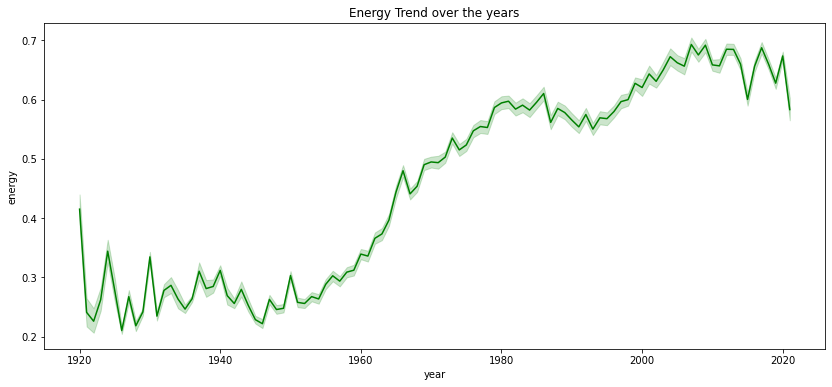

In [16]:
fig,ax=plt.subplots(figsize=(14,6))
sns.lineplot(x="year", y="energy", data=df, ax=ax, color='green')
plt.title('Energy Trend over the years')

Text(0.5, 1.0, 'Danceability Trend over the years')

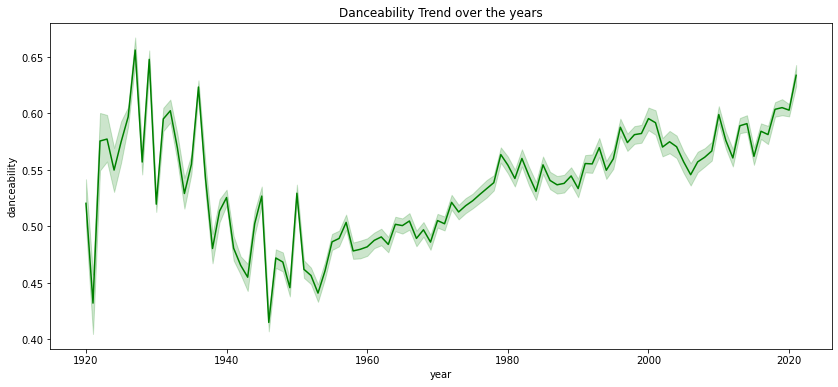

In [17]:
fig,ax=plt.subplots(figsize=(14,6))
sns.lineplot(x="year", y="danceability", data=df, ax=ax, color='green')
plt.title('Danceability Trend over the years')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

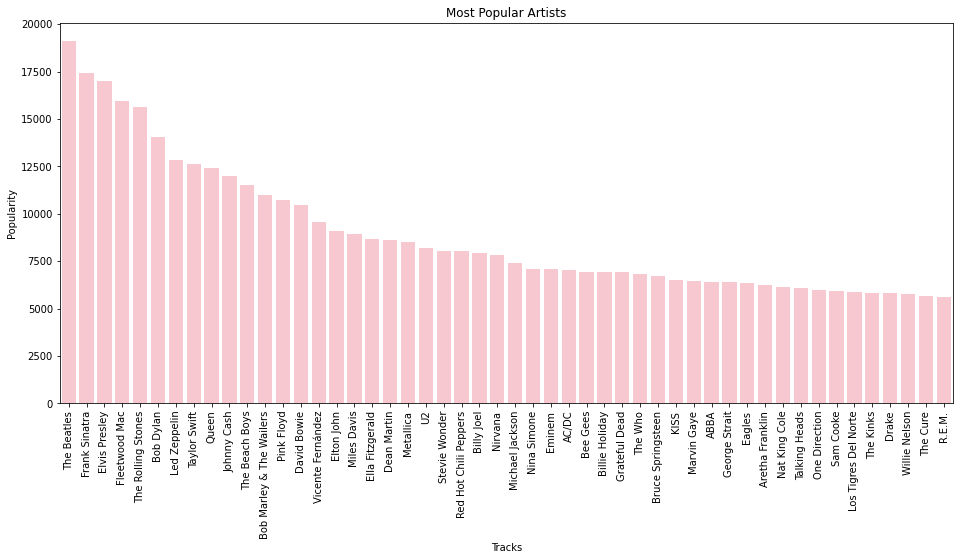

In [18]:
# 50 Most Popular Artists

fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("Artists")['popularity'].sum().sort_values(ascending=False)[:50]
axis = sns.barplot(popular.index,popular,color='pink')
axis.set_title('Most Popular Artists')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [19]:
df_genres = pd.read_csv("data_by_genres_o.csv") # will create a dataframe of the dataset and store in the dataset variable
df_genres    #import data by genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [20]:
df_genres= df_genres.sort_values(by=['popularity' ],ascending=False)    #top 20 popular songs
df_genres[['genres','popularity']].head(20) 

,genres,popularity
237,basshall,80.666667
2778,turkish edm,80.000000
2533,south african house,80.000000
2755,trap venezolano,80.000000
46,alberta hip hop,78.500000
536,chinese electropop,78.500000
37,afroswing,77.312500
31,afro soul,77.000000
2383,russian dance,77.000000
1239,guaracha,77.000000


In [21]:
df_genres= df_genres.sort_values(by=['popularity' ],ascending=True)    # 20  least popular songs
df_genres[['genres','popularity']].head(20) 

,genres,popularity
1723,medieval,0.0
2964,zambian pop,0.0
902,dubsteppe,0.0
1328,hungarian pop,0.0
44,albany ny indie,0.0
1329,hungarian rock,0.0
1330,hungarian techno,0.0
2204,portuguese early music,0.0
840,deep space rock,0.0
2953,xtra raw,0.0


## **Predicting the popularity of the song using Classification models**

**Data Preprocessing**

In [25]:
df_main = pd.read_csv("TheSpotifyDataset.csv") # will create a dataframe of the dataset and store in the dataset variable
df_main

,acousticness,Artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"""Screamin' Jay Hawkins""",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1/5/1920,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1/1/1920,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,10/1/1920,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"DJ Combo, 'Sander-7', 'Tony T'",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,12/25/2020,0.0356,125.972,0.1860,2020
174385,0.795000,Alessia Cara,0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,1/22/2021,0.0360,94.710,0.2280,2021
174386,0.806000,Roger Fly,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,12/9/2020,0.0282,108.058,0.7140,2020
174387,0.920000,Taylor Swift,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,1/7/2021,0.0377,171.319,0.3200,2021


In [26]:
#dropping the unnecessary columns
df_main=df_main.drop('id',1)
df_main=df_main.drop('Artists',1)     
df_main=df_main.drop('name',1)
df_main=df_main.drop('explicit',1)
df_main=df_main.drop('release_date',1)
df_main=df_main.drop('year',1)
df_main=df_main.drop('mode',1)

In [27]:
#converted the target variable into a binary variable for prediction
df_main.loc[df_main['popularity'] < 57, 'popularity'] = 0     
df_main.loc[df_main['popularity'] >= 57, 'popularity'] = 1
df_main.loc[df_main['popularity'] == 1]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence
2462,0.97200,0.504,181440,0.0644,0.000004,2,0.1740,-14.754,1,0.0408,106.994,0.403
3662,0.93800,0.271,203773,0.2190,0.000860,0,0.2630,-9.767,1,0.0310,74.680,0.375
4262,0.67300,0.317,177480,0.1580,0.353000,9,0.3380,-16.485,1,0.0381,130.503,0.247
4662,0.97000,0.156,162333,0.1840,0.004580,6,0.2600,-14.820,1,0.0393,180.887,0.107
4862,0.64600,0.500,175333,0.2240,0.000000,3,0.2840,-12.431,1,0.0935,202.481,0.620
...,...,...,...,...,...,...,...,...,...,...,...,...
174329,0.03020,0.753,167160,0.7560,0.000004,10,0.0754,-4.662,1,0.0630,145.948,0.679
174351,0.00984,0.530,253840,0.7590,0.000000,7,0.3190,-7.067,1,0.0351,131.999,0.502
174353,0.71500,0.734,43320,0.3460,0.000000,2,0.3940,-11.722,1,0.3550,88.849,0.930
174361,0.10500,0.781,172720,0.4870,0.000000,1,0.0802,-7.301,1,0.1670,129.941,0.327


In [30]:
#reindexed the target variable
column_names=["acousticness","danceability", "energy","instrumentalness","liveness","loudness","speechiness","key","tempo","duration_ms","valence","popularity"]
df_main=df_main.reindex(columns=column_names)
df_main

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,key,tempo,duration_ms,valence,popularity
0,0.994980,0.605263,0.224,0.000522,0.3790,0.741868,0.096395,0.454545,0.615900,0.030637,0.6340,0
1,0.645582,0.862348,0.517,0.026400,0.0809,0.825918,0.054995,0.454545,0.356823,0.027237,0.9500,0
2,0.996988,0.654858,0.186,0.000018,0.5190,0.750168,0.179197,0.000000,0.400810,0.029792,0.6890,0
3,0.000174,0.738866,0.798,0.801000,0.1280,0.825135,0.043769,0.181818,0.525640,0.078215,0.0422,0
4,0.296185,0.712551,0.707,0.000246,0.4020,0.845102,0.079094,0.909091,0.501324,0.030054,0.2990,0
...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009207,0.801619,0.866,0.000060,0.1780,0.859933,0.036663,0.545455,0.517324,0.026752,0.1860,0
174385,0.798193,0.434211,0.211,0.000000,0.1960,0.756949,0.037075,0.363636,0.388942,0.026209,0.2280,0
174386,0.809237,0.679150,0.589,0.920000,0.1130,0.745549,0.029042,0.363636,0.443757,0.039977,0.7140,0
174387,0.923695,0.467611,0.240,0.000000,0.1130,0.750497,0.038826,0.000000,0.703549,0.044824,0.3200,1


In [31]:
#normalization using min-max
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df_main.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    
for col in cols_numeric:
    df_main[col]=(df_main[col]-df_main[col].min())/(df_main[col].max()-df_main[col].min())

df_main

Selected numerical columns:
 ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'key', 'tempo', 'duration_ms', 'valence', 'popularity']


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,key,tempo,duration_ms,valence,popularity
0,0.994980,0.605263,0.224,0.000522,0.3790,0.741868,0.096395,0.454545,0.615900,0.030637,0.6340,0.0
1,0.645582,0.862348,0.517,0.026400,0.0809,0.825918,0.054995,0.454545,0.356823,0.027237,0.9500,0.0
2,0.996988,0.654858,0.186,0.000018,0.5190,0.750168,0.179197,0.000000,0.400810,0.029792,0.6890,0.0
3,0.000174,0.738866,0.798,0.801000,0.1280,0.825135,0.043769,0.181818,0.525640,0.078215,0.0422,0.0
4,0.296185,0.712551,0.707,0.000246,0.4020,0.845102,0.079094,0.909091,0.501324,0.030054,0.2990,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009207,0.801619,0.866,0.000060,0.1780,0.859933,0.036663,0.545455,0.517324,0.026752,0.1860,0.0
174385,0.798193,0.434211,0.211,0.000000,0.1960,0.756949,0.037075,0.363636,0.388942,0.026209,0.2280,0.0
174386,0.809237,0.679150,0.589,0.920000,0.1130,0.745549,0.029042,0.363636,0.443757,0.039977,0.7140,0.0
174387,0.923695,0.467611,0.240,0.000000,0.1130,0.750497,0.038826,0.000000,0.703549,0.044824,0.3200,1.0


In [29]:
from sklearn import preprocessing

y = df_main['popularity'] # define label as nominal values
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers 

df_main['popularity'] = y_encoded
x = df_main.drop('popularity',1)
y = df_main['popularity'] 
df_main

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence
0,0.994980,0.605263,0.030637,0.224,0.000522,0.454545,0.3790,0.741868,0,0.096395,0.615900,0.6340
1,0.645582,0.862348,0.027237,0.517,0.026400,0.454545,0.0809,0.825918,0,0.054995,0.356823,0.9500
2,0.996988,0.654858,0.029792,0.186,0.000018,0.000000,0.5190,0.750168,0,0.179197,0.400810,0.6890
3,0.000174,0.738866,0.078215,0.798,0.801000,0.181818,0.1280,0.825135,0,0.043769,0.525640,0.0422
4,0.296185,0.712551,0.030054,0.707,0.000246,0.909091,0.4020,0.845102,0,0.079094,0.501324,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009207,0.801619,0.026752,0.866,0.000060,0.545455,0.1780,0.859933,0,0.036663,0.517324,0.1860
174385,0.798193,0.434211,0.026209,0.211,0.000000,0.363636,0.1960,0.756949,0,0.037075,0.388942,0.2280
174386,0.809237,0.679150,0.039977,0.589,0.920000,0.363636,0.1130,0.745549,0,0.029042,0.443757,0.7140
174387,0.923695,0.467611,0.044824,0.240,0.000000,0.000000,0.1130,0.750497,1,0.038826,0.703549,0.3200


###**Classification Models- K-Nearest Neighbour, Logistic and Neural Network**

**K-Nearest Neighbour**

In [32]:
y = df_main.values[:,11]
x = df_main.values[:,0:10]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [33]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("By hold out evaluation for KNN Algorithm")
for k in range(1, 10, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro'),
         ', Recall: ', recall_score(y_test, y_pred, average='micro'))
    
print("By N-fold cross evaluations KNN Algorithm")
from sklearn.model_selection import cross_val_score

for k in range(1, 10, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
    print('K =', k, ', Accuracy: ',acc)

By hold out evaluation for KNN Algorithm
K = 1 , Accuracy:  0.856585813406732 , Precision:  0.856585813406732 , Recall:  0.856585813406732
K = 3 , Accuracy:  0.8835082286828373 , Precision:  0.8835082286828373 , Recall:  0.8835082286828373
K = 5 , Accuracy:  0.8923676816331212 , Precision:  0.8923676816331212 , Recall:  0.8923676816331212
K = 7 , Accuracy:  0.8954641894604048 , Precision:  0.8954641894604048 , Recall:  0.8954641894604048
K = 9 , Accuracy:  0.8971558002179024 , Precision:  0.8971558002179024 , Recall:  0.8971558002179024
By N-fold cross evaluations KNN Algorithm
K = 1 , Accuracy:  0.8512463027297048
K = 3 , Accuracy:  0.8815234595301529
K = 5 , Accuracy:  0.8908589274068976
K = 7 , Accuracy:  0.8952915527508555
K = 9 , Accuracy:  0.8969258327730467


In [34]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[30999,   423],
       [ 3164,   292]])

**Logistic Regression**

In [35]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# by hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_main, y_encoded, test_size=0.3)
clf=LogisticRegression()
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation for Logistic : ',acc)


# by N-fold cross validation
from sklearn.model_selection import cross_val_score
clf=LogisticRegression()
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation for Logistic :",acc)

Accuracy by hold-out evaluation for Logistic :  1.0
Accuracy by N-fold Cross Validation for Logistic : 0.9012552425047422


In [36]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[47222,     0],
       [    0,  5095]])

In [37]:
from sklearn.neural_network import MLPClassifier

# by hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_main, y_encoded, test_size=0.2)
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation for Neural Netwrok: ',acc)

x=df_main.drop('popularity',axis=1)
y=df_main['popularity']
# by N-fold cross validation
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,8), random_state=1)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation Neural Netwrok:",acc)

Accuracy by hold-out evaluation for Neural Netwrok:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Accuracy by N-fold Cross Validation Neural Netwrok: 0.9028608674351671


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[31522,     0],
       [    0,  3356]])

## **K-means Clustering**

In [39]:
#PreProcessing for KMeans Clustering 
dancePop = df.iloc[:,[2, 12]].values     #'iloc' takes the indexes of the columns and rows we want to extract
print(dancePop)

[[ 0.598 12.   ]
 [ 0.852  7.   ]
 [ 0.647  4.   ]
 ...
 [ 0.316  0.   ]
 [ 0.429  0.   ]
 [ 0.462 69.   ]]


In [40]:
#dealing with missing values and filling it with mean value
imputer = SimpleImputer(missing_values=np.nan,strategy ='mean')
imputer.fit(dancePop)
dancePop = imputer.transform(dancePop)

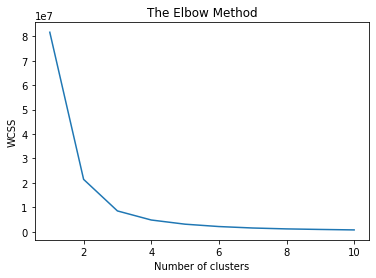

In [41]:
wcss = [] #an empty list, the y axis, Within cluster sum of squares, given by summation(summation(PiCi)sq.)
for i in range(1, 11): # (1,11) because we are assuming that we need 10 clusters to work with
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # advanced initialization trick, so that we don't fall into the random initialization trap
    kmeans.fit(dancePop) #train the algorithm with the dataset
    wcss.append(kmeans.inertia_) #gives us WCSS values, it is inbuilt in python
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dancePop)

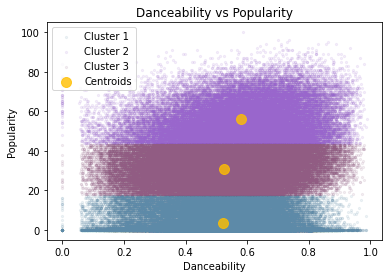

In [45]:
plt.scatter(dancePop[y_kmeans == 0, 0], dancePop[y_kmeans == 0, 1], s = 5, c = '#5d8aa8', label = 'Cluster 1', alpha = 0.1)
plt.scatter(dancePop[y_kmeans == 1, 0], dancePop[y_kmeans == 1, 1], s = 5, c = '#9966cc', label = 'Cluster 2', alpha = 0.1)
plt.scatter(dancePop[y_kmeans == 2, 0], dancePop[y_kmeans == 2, 1], s = 5, c = '#915c83', label = 'Cluster 3', alpha = 0.1)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = '#ffbf00', label = 'Centroids', alpha = 0.8)

plt.title('Danceability vs Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.legend()
plt.show()

**Popularity of the song and Year of release**

In [46]:
popYear = df.iloc[:,[12, 17]].values #extracting Popularity of the song and Year of release
print(popYear)

[[  12 1920]
 [   7 1920]
 [   4 1920]
 ...
 [   0 2021]
 [   0 2021]
 [  69 2021]]


In [47]:
#dealing with missing values and filling it with mean value
imputer = SimpleImputer(missing_values=np.nan,strategy ='mean')
imputer.fit(popYear)
popYear = imputer.transform(popYear)

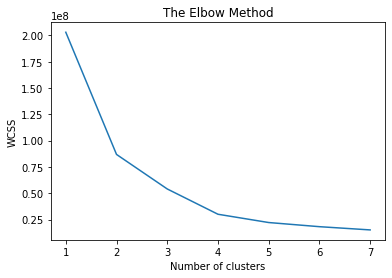

In [48]:
wcss = [] #an empty list, the y axis, Within cluster sum of squares, given by summation(summation(PiCi)sq.)
for i in range(1, 8): # (1,8) because we are assuming that we need 7 clusters to work with
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # advanced initialization trick, so that we don't fall into the random initialization trap
    kmeans.fit(popYear) #train the algorithm with the dataset
    wcss.append(kmeans.inertia_) #gives us WCSS values, it is inbuilt in python
    
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(popYear)

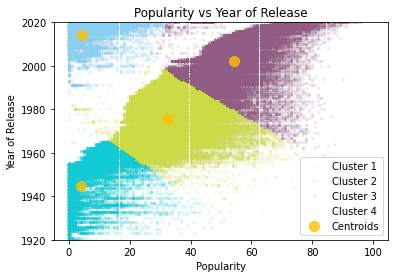

In [50]:
plt.scatter(popYear[y_kmeans == 0, 0], popYear[y_kmeans == 0, 1], s = 5, c = '#ccda46', label = 'Cluster 1', alpha = 0.1)
plt.scatter(popYear[y_kmeans == 1, 0], popYear[y_kmeans == 1, 1], s = 5, c = '#12cad6', label = 'Cluster 2', alpha = 0.1)
plt.scatter(popYear[y_kmeans == 2, 0], popYear[y_kmeans == 2, 1], s = 5, c = '#915c83', label = 'Cluster 3', alpha = 0.1)
plt.scatter(popYear[y_kmeans == 3, 0], popYear[y_kmeans == 3, 1], s = 5, c = '#89cff0', label = 'Cluster 4', alpha = 0.1)

plt.ylim(1920,2020,10)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = '#ffbf00', label = 'Centroids', alpha = 0.8)
plt.title('Popularity vs Year of Release')
plt.xlabel('Popularity')
plt.ylabel('Year of Release')
plt.legend()
plt.show()

# **Thank you!**